* window size => number how previous sample that use to predict

In [1]:
import torch
import torch.nn as nn
import pandas as pd
import matplotlib.pyplot as plt 


# Load data

In [3]:
df = pd.read_csv("datasets/appl_1980_2014.csv")
df.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,2014-07-08,96.27,96.80,93.92,95.35,65130000,95.35
1,2014-07-07,94.14,95.99,94.10,95.97,56305400,95.97
2,2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03
3,2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48
4,2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52


In [6]:
df = df[-1::-1]

In [ ]:
# data wrangler

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8465 entries, 8464 to 0
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       8465 non-null   object 
 1   Open       8465 non-null   float64
 2   High       8465 non-null   float64
 3   Low        8465 non-null   float64
 4   Close      8465 non-null   float64
 5   Volume     8465 non-null   int64  
 6   Adj Close  8465 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 463.1+ KB


In [8]:
df["Date"] = pd.to_datetime(df["Date"])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8465 entries, 8464 to 0
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       8465 non-null   datetime64[ns]
 1   Open       8465 non-null   float64       
 2   High       8465 non-null   float64       
 3   Low        8465 non-null   float64       
 4   Close      8465 non-null   float64       
 5   Volume     8465 non-null   int64         
 6   Adj Close  8465 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 463.1 KB


In [9]:
df.Date.dt.year.unique()

array([1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990,
       1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001,
       2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012,
       2013, 2014], dtype=int64)

In [10]:
cond= (df.Date.dt.year>2009) & (df.Date.dt.year<2014)
df = df[cond]
df.Date.dt.year.unique()

array([2010, 2011, 2012, 2013], dtype=int64)

## set index

In [11]:
df = df.set_index("Date")
df.index

DatetimeIndex(['2010-01-04', '2010-01-05', '2010-01-06', '2010-01-07',
               '2010-01-08', '2010-01-11', '2010-01-12', '2010-01-13',
               '2010-01-14', '2010-01-15',
               ...
               '2013-12-17', '2013-12-18', '2013-12-19', '2013-12-20',
               '2013-12-23', '2013-12-24', '2013-12-26', '2013-12-27',
               '2013-12-30', '2013-12-31'],
              dtype='datetime64[ns]', name='Date', length=1006, freq=None)

In [12]:
df.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2010-01-04,213.43,214.50,212.38,214.01,123432400,29.22
2010-01-05,214.60,215.59,213.25,214.38,150476200,29.27
2010-01-06,214.38,215.23,210.75,210.97,138040000,28.81
2010-01-07,211.75,212.00,209.05,210.58,119282800,28.75
2010-01-08,210.30,212.00,209.06,211.98,111902700,28.94


# EDA

In [13]:
df.Close

Date
2010-01-04    214.01
2010-01-05    214.38
2010-01-06    210.97
2010-01-07    210.58
2010-01-08    211.98
               ...  
2013-12-24    567.67
2013-12-26    563.90
2013-12-27    560.09
2013-12-30    554.52
2013-12-31    561.02
Name: Close, Length: 1006, dtype: float64

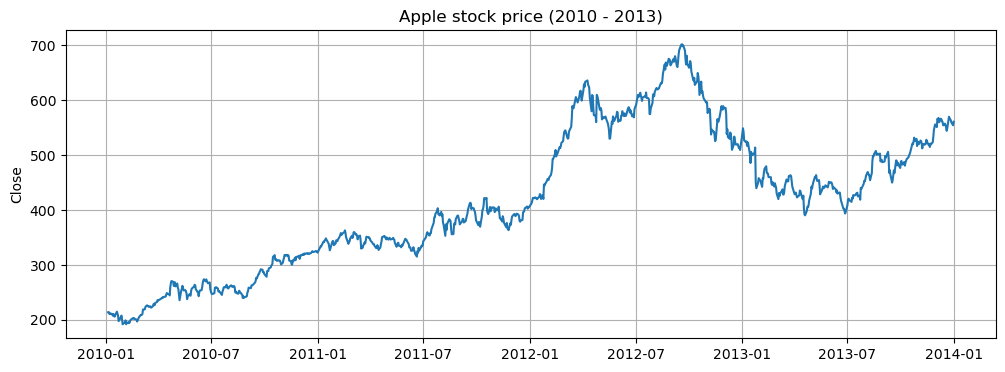

In [15]:
# plot 
plt.figure(figsize=(12,4))
plt.title("Apple stock price (2010 - 2013)")
plt.ylabel("Close")
plt.grid()
plt.plot(df.Close)

# Window size features

In [16]:
y =df["Close"].values.astype('float')
train_set = y[:-15] # all past 
test_set = y[-15:] # last 15 days

In [17]:
type(train_set)

numpy.ndarray

# Normalization

In [18]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(-1,1))

train_set_norm = scaler.fit_transform(train_set.reshape(-1,1))


In [19]:
train_set_norm.min(),train_set_norm.max()

(-0.9999999999999999, 1.0)

# Prepare data

In [20]:
# cnvert np to tensor
train_set_norm = torch.FloatTensor(train_set_norm).view(-1)
train_set_norm.shape

torch.Size([991])

In [21]:


# define function to creat training set (ws days -> next 1 day)

def create_data(train,ws):

    data = []
    for i in range(train.shape[0]-ws):
        x =train[i:i+ws]
        y = train[i+ws:i+ws+1]
        data.append((x,y))

    return data



In [22]:

# define window size
ws = 30

ts = create_data(train_set_norm,ws)

In [23]:
ts[0]

(tensor([-0.9139, -0.9124, -0.9258, -0.9273, -0.9219, -0.9292, -0.9386, -0.9271,
         -0.9318, -0.9456, -0.9099, -0.9228, -0.9372, -0.9776, -0.9568, -0.9455,
         -0.9379, -0.9716, -1.0000, -0.9895, -0.9851, -0.9718, -1.0000, -0.9866,
         -0.9919, -0.9838, -0.9880, -0.9740, -0.9673, -0.9555]),
 tensor([-0.9588]))

# Define network

In [78]:
class RNN(nn.Module):

    def __init__(self, architect= [1,30,1]):
        super().__init__()
        self.hs = architect[1]
        self.lstm = nn.LSTM(architect[0],self.hs)
        self.linear = nn.Linear(self.hs,architect[-1])


    def forward(self,input_):
        out,_ = self.lstm(input_.reshape(input_.shape[0],1,-1))
        out = self.linear(out.view(len(input_),-1)[-1])
        return out

        

In [79]:
sample , target = ts[0]

In [80]:
sample_reshape = sample.reshape(sample.shape[0],1,-1)

In [81]:
sample.shape,sample_reshape.shape

(torch.Size([30]), torch.Size([30, 1, 1]))

In [82]:
lstm = nn.LSTM(1,50)


In [83]:
out,hidden = lstm(sample_reshape)

In [84]:
out.shape # every hidden state

torch.Size([30, 1, 50])

In [85]:
hidden[0].shape # last hidden state

torch.Size([1, 1, 50])

# Training

In [86]:
torch.manual_seed(96)
model = RNN()

criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(),lr = 0.001) #0.01

In [87]:
epoch = 5


for i in range(epoch):

    total_loss= 0.0


    for X,y in ts:
        pred = model(X)
        loss = criterion(pred,y)

        optimizer.zero_grad()
        loss.backward()

        optimizer.step()

        total_loss+=loss

    epoch_loss = total_loss/len(ts)

    print(f"epoch {i+1} | mse {epoch_loss:3.8f}")

epoch 1 | mse 0.02400480
epoch 2 | mse 0.02029574
epoch 3 | mse 0.01042494
epoch 4 | mse 0.00738694
epoch 5 | mse 0.00664701


# Testing

In [88]:
preds = train_set_norm[-ws:].tolist()
model.eval()

for i in range(ws):
    seq = torch.FloatTensor(preds[-ws:])

    with torch.no_grad():
        y_hat = model(seq)
        preds.append(y_hat.item())


In [89]:
preds[-ws:]

[0.3837146759033203,
 0.37267306447029114,
 0.3654279410839081,
 0.3609848618507385,
 0.35823118686676025,
 0.35647207498550415,
 0.35529381036758423,
 0.354461133480072,
 0.3538445234298706,
 0.35337331891059875,
 0.35300689935684204,
 0.3527204096317291,
 0.35249653458595276,
 0.3523221015930176,
 0.35218679904937744,
 0.35208213329315186,
 0.35200145840644836,
 0.3519393503665924,
 0.3518916368484497,
 0.3518548607826233,
 0.35182663798332214,
 0.3518049120903015,
 0.35178813338279724,
 0.3517751395702362,
 0.35176512598991394,
 0.3517574071884155,
 0.3517514169216156,
 0.3517467677593231,
 0.3517431616783142,
 0.35174041986465454]

# Plot

In [90]:
import numpy as np
np.array(preds[-ws:]).reshape(-1,1).shape

(30, 1)

In [91]:
true = scaler.inverse_transform(np.array(preds[-ws:]).reshape(-1,1))

In [92]:
x = df["Close"][-ws:].index

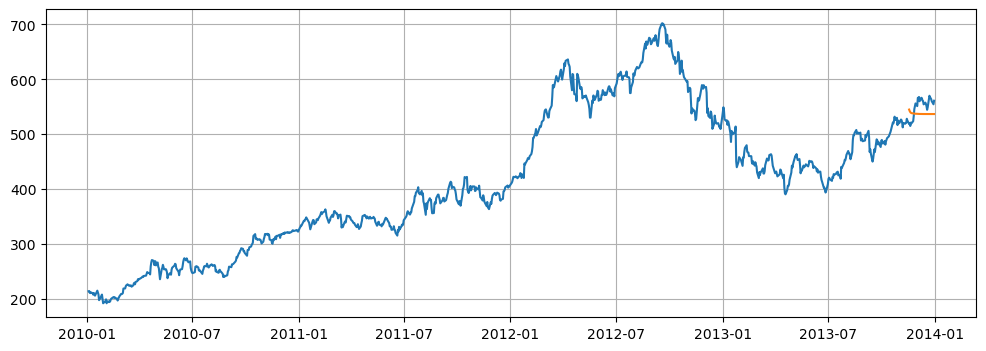

In [93]:
plt.figure(figsize=(12,4))
plt.grid()
plt.plot(df["Close"])
plt.plot(x,true)
plt.show()